## Exploratory data analysis of US Protest Data

In [1]:
#!pip install geopandas
!pip install -U kaleido

Import libraries

In [447]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd
import datetime as dt
import kaleido
import plotly.io as pio
import matplotlib.pylab as pl
import seaborn as sns

In [3]:
df = pd.read_csv('North_America-United_States.csv')

### Using ACLED user guide found here: 
https://www.acleddata.com/wp-content/uploads/2016/01/ACLED_User-Guide_2016.pdf

In [4]:
df.head()

data_id  iso event_id_cnty  event_id_no_cnty    event_date  year  \
0  9383068  840      USA44621             44621  24 June 2022  2022   
1  9383099  840      USA44775             44775  24 June 2022  2022   
2  9383100  840      USA44783             44783  24 June 2022  2022   
3  9383101  840      USA44788             44788  24 June 2022  2022   
4  9383102  840      USA44793             44793  24 June 2022  2022   

   time_precision event_type                      sub_event_type  \
0               1   Protests  Excessive force against protesters   
1               1   Protests                    Peaceful protest   
2               1   Protests                    Peaceful protest   
3               1   Protests                    Peaceful protest   
4               1   Protests                    Peaceful protest   

                       actor1  ...        location  latitude longitude  \
0  Protesters (United States)  ...    Cedar Rapids   41.9738  -91.6768   
1  Protesters (United States)  ...    Fayetteville   36.0626  -94.1574   
2  Protesters (United States)  ...          Eureka   40.8040 -124.1654   
3  Protesters (United States)  ...  West Hollywood   34.0900 -118.3617   
4  Protesters (United States)  ...        Monterey   36.6031 -121.8936   

  geo_precision                                             source  \
0             1  KCRG-TV9; Network Contagion Research Institute...   
1             1                      Southwest Times Record; 40/29   
2             1            Lost Coast Outpost; North Coast Journal   
3             1                                CBS News; Liveuamap   
4             1                      Monterey County Herald; KSBW8   

              source_scale                                              notes  \
0   Local partner-National  On 24 June 2022, 'pro-choice' protesters gathe...   
1              Subnational  On 24 June 2022, well over 100 people includin...   
2              Subnational  On 24 June 2022, hundreds of people rallied ou...   
3  Local partner-New media  On 24 June 2022, hundreds of people rallied in...   
4              Subnational  On 24 June 2022, hundreds of people rallied at...   

  fatalities   timestamp iso3  
0          0  1656458658  USA  
1          0  1656458658  USA  
2          0  1656458658  USA  
3          0  1656458658  USA  
4          0  1656458658  USA  

[5 rows x 31 columns]

In [5]:
df.describe()

data_id      iso  event_id_no_cnty          year  time_precision  \
count  4.225300e+04  42253.0      42253.000000  42253.000000    42253.000000   
mean   8.266701e+06    840.0      22425.844839   2020.629446        1.005420   
std    5.542718e+05      0.0      13079.308469      0.742141        0.074062   
min    7.593655e+06    840.0          1.000000   2020.000000        1.000000   
25%    7.616741e+06    840.0      11017.000000   2020.000000        1.000000   
50%    8.265289e+06    840.0      22438.000000   2020.000000        1.000000   
75%    8.680161e+06    840.0      33738.000000   2021.000000        1.000000   
max    9.383708e+06    840.0      45052.000000   2022.000000        3.000000   

             inter1        inter2   interaction  admin3      latitude  \
count  42253.000000  42253.000000  42253.000000     0.0  42253.000000   
mean       5.974629      0.330107     58.228173     NaN     38.370794   
std        0.157251      1.280444      9.165026     NaN      5.195601   
min        5.000000      0.000000     15.000000     NaN     19.442700   
25%        6.000000      0.000000     60.000000     NaN     34.799800   
50%        6.000000      0.000000     60.000000     NaN     39.226100   
75%        6.000000      0.000000     60.000000     NaN     41.850000   
max        6.000000      8.000000     68.000000     NaN     71.290600   

          longitude  geo_precision   fatalities     timestamp  
count  42253.000000   42253.000000  42253.00000  4.225300e+04  
mean     -92.542066       1.007952      0.00071  1.627586e+09  
std       18.213665       0.097944      0.03076  1.388701e+07  
min     -166.534100       1.000000      0.00000  1.612546e+09  
25%     -106.651100       1.000000      0.00000  1.612547e+09  
50%      -86.443600       1.000000      0.00000  1.624483e+09  
75%      -77.615500       1.000000      0.00000  1.638920e+09  
max      -67.461400       3.000000      3.00000  1.656459e+09

# Data preprocessing
* Check how many null values and process accordingly
* Drop duplicate rows
* Convert dates and location columns to usable versions

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42253 entries, 0 to 42252
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_id           42253 non-null  int64  
 1   iso               42253 non-null  int64  
 2   event_id_cnty     42253 non-null  object 
 3   event_id_no_cnty  42253 non-null  int64  
 4   event_date        42253 non-null  object 
 5   year              42253 non-null  int64  
 6   time_precision    42253 non-null  int64  
 7   event_type        42253 non-null  object 
 8   sub_event_type    42253 non-null  object 
 9   actor1            42253 non-null  object 
 10  assoc_actor_1     32392 non-null  object 
 11  inter1            42253 non-null  int64  
 12  actor2            3882 non-null   object 
 13  assoc_actor_2     1152 non-null   object 
 14  inter2            42253 non-null  int64  
 15  interaction       42253 non-null  int64  
 16  region            42253 non-null  object

### Columns actor2, assoc_actor2, and admin3 contain null values

In [7]:
#checking for duplicate rows
df.duplicated().sum()

0

### There are no duplicate rows

In [8]:
# Function to convert event_date column: string to datetime 
def convert(date_time): 
    format = '%d %B %Y'
    datetime_str = dt.datetime.strptime(date_time, format) 
  
    return datetime_str 

In [9]:
#create a new column by applying convert function to event_date column
df['event_date_formatted'] = df['event_date'].apply(convert)

### Create a weekday column

In [16]:
df_dates['weekday'] = df_dates['event_date_formatted'].apply(lambda x: x.weekday())

### Split associated actors columns by ; to get a list of associated actors of each row

In [96]:
df['assoc_actors_split'] =  df['assoc_actor_1'].apply(lambda x: x.split(';') if pd.isna(x) == False else x)

# Exploratory Data Analysis

In [83]:
df.groupby(['actor2'])['data_id'].count().nlargest(10)

actor2
Protesters (United States)                                                                   1678
Police Forces of the United States (2017-2021)                                               1332
Police Forces of the United States (2021-)                                                    365
Rioters (United States)                                                                       151
Sole Perpetrator (United States)                                                              130
Civilians (United States)                                                                     108
Police Forces of the United States (2017-2021) Prison Guards                                   23
Private Security Forces (United States)                                                        21
Police Forces of the United States (2017-2021) Protecting American Communities Task Force      17
Police Forces of the United States (2021-) Department of Homeland Security                      9
Name: data_id

### The largest actors are protesters and police forces respectively

### When did fatalities occur and where?

In [112]:
temp = pd.DataFrame(df.groupby(['event_date_formatted', 'location'])['fatalities'].sum()).reset_index()
temp2 = temp[temp['fatalities']>0]

In [116]:
temp2.sort_values(by = ['fatalities', 'event_date_formatted'], ascending = False)

event_date_formatted                       location  fatalities
21130           2021-01-06  Washington DC - National Mall           3
14748           2020-08-25                        Kenosha           2
4609            2020-06-01                         Cicero           2
34420           2022-02-19           Portland - Northeast           1
31272           2021-10-09                      Hawthorne           1
28802           2021-07-26                     Fort Worth           1
27706           2021-06-20                         Aurora           1
27503           2021-06-13                    Minneapolis           1
17685           2020-10-10                         Denver           1
15132           2020-08-29            Portland - Downtown           1
14881           2020-08-27                         Austin           1
12537           2020-07-25                         Austin           1
11286           2020-07-05                   Indianapolis           1
11111           2020-07-04                        Atlanta           1
11239           2020-07-04                        Seattle           1
10626           2020-06-27                     Louisville           1
5510            2020-06-03                    Bakersfield           1
5340            2020-06-02                   Philadelphia           1
4748            2020-06-01                      Las Vegas           1
4907            2020-06-01                    Saint Louis           1
4109            2020-05-31                        Chicago           1
3866            2020-05-30                          Omaha           1
3923            2020-05-30                    Saint Louis           1
3390            2020-05-28                    Minneapolis           1
3336            2020-05-27                    Minneapolis           1
1586            2020-02-23                      Brunswick           1

A lot of fatalities occurred in May 27, 2020 - August 29, 2020

## What is the distribution of protests by event type and sub event type?

In [20]:
df.groupby('event_type')['data_id'].count()

event_type
Protests    41181
Riots        1072
Name: data_id, dtype: int64

In [21]:
df.groupby(['event_type', 'sub_event_type'])['data_id'].count()

event_type  sub_event_type                    
Protests    Excessive force against protesters      145
            Peaceful protest                      39911
            Protest with intervention              1125
Riots       Mob violence                             96
            Violent demonstration                   976
Name: data_id, dtype: int64

### Peaceful protest are most common, followed by protests with intervention

In [22]:
df.groupby(['event_type', 'sub_event_type'])['fatalities'].sum()

event_type  sub_event_type                    
Protests    Excessive force against protesters     4
            Peaceful protest                       0
            Protest with intervention              0
Riots       Mob violence                           6
            Violent demonstration                 20
Name: fatalities, dtype: int64

### The most fatalities occurred in violent demonstrations

## Number of protests by date

In [13]:
df_dates = pd.DataFrame(df.groupby(['event_date_formatted'])['data_id'].count()).reset_index()
#df_dates2 = df_dates[df_dates['fatalities']>0]

In [14]:
df_dates 

event_date_formatted  data_id
0             2020-01-01        7
1             2020-01-02        7
2             2020-01-03       10
3             2020-01-04       93
4             2020-01-05       26
..                   ...      ...
900           2022-06-20       16
901           2022-06-21       23
902           2022-06-22       19
903           2022-06-23       27
904           2022-06-24      280

[905 rows x 2 columns]

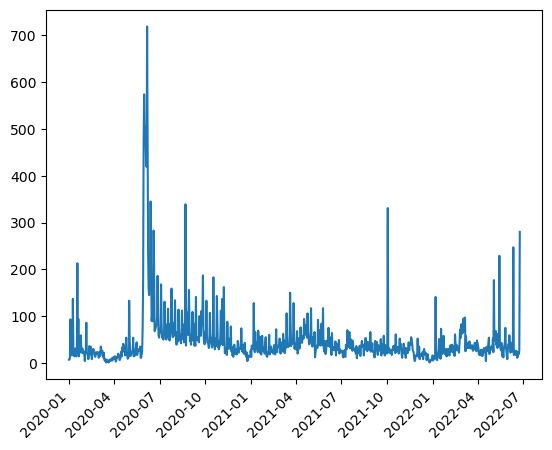

In [15]:
plt.plot(df_dates['event_date_formatted'], df_dates['data_id'])
plt.xticks(rotation=45, ha='right')
plt.show()

### Types of protests over time

In [119]:
df_event_dates =  pd.DataFrame(df.groupby(['event_type', 'sub_event_type', 'event_date_formatted'])['data_id'].count()).reset_index()
df_event_dates

event_type                      sub_event_type event_date_formatted  \
0      Protests  Excessive force against protesters           2020-02-05   
1      Protests  Excessive force against protesters           2020-05-14   
2      Protests  Excessive force against protesters           2020-05-29   
3      Protests  Excessive force against protesters           2020-05-30   
4      Protests  Excessive force against protesters           2020-05-31   
...         ...                                 ...                  ...   
1882      Riots               Violent demonstration           2022-05-09   
1883      Riots               Violent demonstration           2022-05-11   
1884      Riots               Violent demonstration           2022-05-13   
1885      Riots               Violent demonstration           2022-05-17   
1886      Riots               Violent demonstration           2022-06-24   

      data_id  
0           1  
1           1  
2           2  
3           4  
4           9  
...       ...  
1882        1  
1883        1  
1884        2  
1885        1  
1886        4  

[1887 rows x 4 columns]

## Event types by year

In [138]:
grp =pd.DataFrame(df.groupby(['year', 'sub_event_type'])['data_id'].count()).reset_index()

In [146]:
grp_pivoted = pd.pivot_table(data=grp, index=['year'], columns=['sub_event_type'], values='data_id')
grp_pivoted = grp_pivoted.reset_index()

[Text(0, 0, '2020'), Text(1, 0, '2021'), Text(2, 0, ' 2022')]

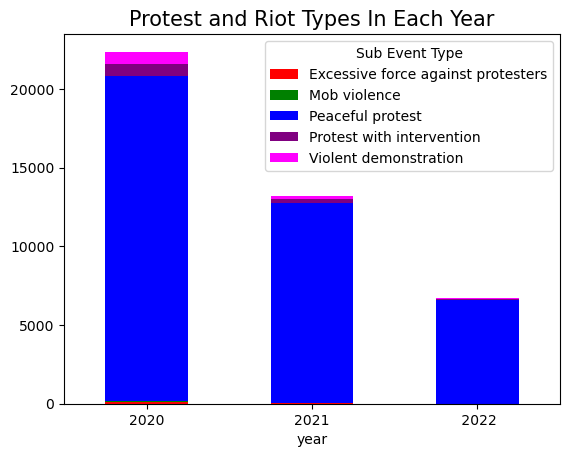

In [155]:
ax = grp_pivoted.plot(x='year',kind='bar',stacked=True, color = ["red", "green", "blue", "purple", "magenta"])
ax.set_title('Protest and Riot Types In Each Year', fontsize=15)
ax.legend(title = 'Sub Event Type')
ax.set_xticklabels(['2020', '2021',' 2022'], rotation=0)


In [162]:
event_types_df = pd.DataFrame(df.groupby(['event_type','event_date_formatted'])['data_id'].count()).reset_index()
event_types_df =  event_types_df.sort_values(by ='event_date_formatted')

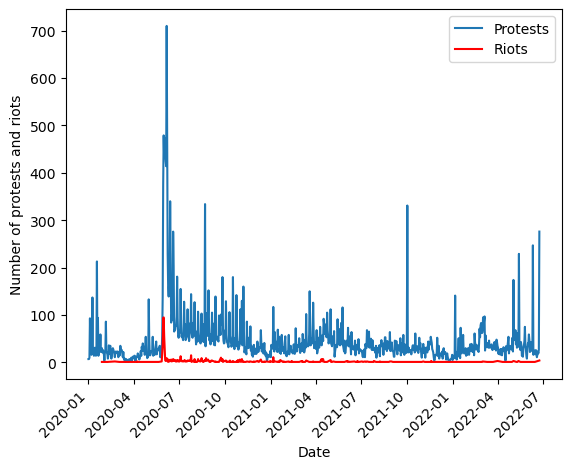

In [171]:
plt.plot(event_types_df.loc[event_types_df['event_type']=='Protests','event_date_formatted'],event_types_df.loc[event_types_df['event_type']=='Protests','data_id'])
plt.plot(event_types_df.loc[event_types_df['event_type']=='Riots','event_date_formatted'],event_types_df.loc[event_types_df['event_type']=='Riots','data_id'], color='red')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of protests and riots')
plt.xlabel('Date')
plt.legend(['Protests', 'Riots'])
plt.show()

## What is the distribution of the number of protests by the day of the week?

In [17]:
df_dates.groupby(['weekday'])['data_id'].sum()

weekday
0     5056
1     5199
2     5330
3     5288
4     5761
5    10292
6     5327
Name: data_id, dtype: int64

#### There are twice as many protests on Saturday on average than any other week.

### What are the most prominent locations of protests?

In [32]:
df['location'].value_counts()

New York - Manhattan    1006
San Francisco            424
Philadelphia             394
New York - Brooklyn      388
Boston                   364
                        ... 
Indianola                  1
Fort Madison               1
Chardon                    1
Lake Palestine             1
Margate City               1
Name: location, Length: 4207, dtype: int64

In [98]:
df['location'].value_counts().nlargest(20)

New York - Manhattan             1006
San Francisco                     424
Philadelphia                      394
New York - Brooklyn               388
Boston                            364
Atlanta                           333
San Diego                         328
Los Angeles - Central             308
Seattle                           277
Sacramento                        273
Pittsburgh                        259
Austin                            256
Washington DC                     256
Miami                             245
Portland                          245
Minneapolis                       241
Oakland                           236
Denver                            230
Washington DC - National Mall     227
Phoenix                           227
Name: location, dtype: int64

### The most prominent locations of protests are cities like New Tork, San Francisco, Philadelphia i.e. cities with large populations primarily on the east and west coast

## Visual location analysis

In [33]:
df_loc = pd.DataFrame(df.groupby(['location', 'country', 'region', 'latitude', 'longitude', 'geo_precision'])['data_id'].count()).reset_index()

In [34]:
df_loc 

location        country         region  latitude  longitude  \
0        4S Ranch  United States  North America   33.0168  -117.1131   
1       Abbeville  United States  North America   29.9747   -92.1343   
2        Aberdeen  United States  North America   33.8251   -88.5437   
3        Aberdeen  United States  North America   35.1313   -79.4306   
4        Aberdeen  United States  North America   39.5096   -76.1641   
...           ...            ...            ...       ...        ...   
5429   Zanesville  United States  North America   39.9404   -82.0132   
5430  Zephyrhills  United States  North America   28.2393   -82.1764   
5431         Zinc  United States  North America   36.2853   -92.9143   
5432         Zion  United States  North America   42.4461   -87.8329   
5433   Zionsville  United States  North America   39.9509   -86.2619   

      geo_precision  data_id  
0                 1        1  
1                 1        3  
2                 1        1  
3                 1        1  
4                 1        1  
...             ...      ...  
5429              1        7  
5430              1        1  
5431              1        1  
5432              1        1  
5433              1        2  

[5434 rows x 7 columns]

### Plot a bubble map showing the concentration of protests

In [39]:
#calculate number of protests by location
df['num_protests_by_location'] = df.groupby(['location', 'latitude', 'longitude'])['data_id'].transform(lambda x: x.count())

In [105]:
fig = px.scatter_geo(df, 
                        lat="latitude", 
                        lon="longitude", 
                     locationmode = 'USA-states',
#                         hover_name="Address", 
#                         hover_data=["Address", "Listed"],
                        #color="Listed",
                        #color_continuous_scale=color_scale,
                        size="num_protests_by_location")
                        #zoom=8, 
#                         height=800,
#                         width=800)
fig.update_layout(title = 'US protests map', title_x=0.5,  geo = dict(
            scope = 'usa'))
#fig.write_image("fig1.jpeg")
#fig.show()

In [109]:
df['region'].unique()

array(['North America'], dtype=object)

### Location of protests colored by sub-event type

In [ ]:
#fig = px.scatter_geo(df, 
                        lat="latitude", 
                        lon="longitude", 
                     locationmode = 'USA-states',
                        hover_name="location", 
                        hover_data=["location"],
                        color="sub_event_type",
                        color_discrete_sequence=["red", "green", "blue", "purple", "magenta"],
                        size="num_protests_by_location")
                        #zoom=8, 
#                         height=800,
#                         width=800)
fig.update_layout(title = 'US protests map', title_x=0.5,  geo = dict(
            scope = 'usa'))
#pio.write_image(fig, "fig2_high_res.png", scale=6, width=1080, height=1080)
#fig.show()

### What are the most commonly appearing actors and associated actors?

In [24]:
df['actor1'].value_counts()

Protesters (United States)    41166
Rioters (United States)        1072
Protesters (International)        7
Protesters (Ethiopia)             5
Protesters (Turkmenistan)         2
Protesters (Israel)               1
Name: actor1, dtype: int64

### Most commonly appearing associated actors over time:

In [251]:
df_actors_1 = pd.DataFrame(df.groupby(['event_date_formatted','assoc_actor_1','year'])['data_id'].count()).reset_index()
df_actors_1 

event_date_formatted                                      assoc_actor_1  \
0               2020-01-01                            BLM: Black Lives Matter   
1               2020-01-01        Government of the United States (2017-2021)   
2               2020-01-01                     Health Workers (United States)   
3               2020-01-02  Labour Group (United States); Teachers (United...   
4               2020-01-02                                    Occupy Movement   
...                    ...                                                ...   
16992           2022-06-24  Women (United States); Rise Up 4 Abortion Righ...   
16993           2022-06-24  Women (United States); Rise Up 4 Abortion Righ...   
16994           2022-06-24  Women (United States); Rise Up 4 Abortion Righ...   
16995           2022-06-24    Women (United States); Students (United States)   
16996           2022-06-24  Women (United States); Students (United States...   

       year  data_id  
0      2020        1  
1      2020        1  
2      2020        1  
3      2020        1  
4      2020        1  
...     ...      ...  
16992  2022        1  
16993  2022        1  
16994  2022        1  
16995  2022        2  
16996  2022        1  

[16997 rows x 4 columns]

In [252]:
df_actors_1 ['assoc_actors_split'] =  df_actors_1 ['assoc_actor_1'].apply(lambda x: x.split('; ') if pd.isna(x) == False else x)

In [253]:
df_actors_1

event_date_formatted                                      assoc_actor_1  \
0               2020-01-01                            BLM: Black Lives Matter   
1               2020-01-01        Government of the United States (2017-2021)   
2               2020-01-01                     Health Workers (United States)   
3               2020-01-02  Labour Group (United States); Teachers (United...   
4               2020-01-02                                    Occupy Movement   
...                    ...                                                ...   
16992           2022-06-24  Women (United States); Rise Up 4 Abortion Righ...   
16993           2022-06-24  Women (United States); Rise Up 4 Abortion Righ...   
16994           2022-06-24  Women (United States); Rise Up 4 Abortion Righ...   
16995           2022-06-24    Women (United States); Students (United States)   
16996           2022-06-24  Women (United States); Students (United States...   

       year  data_id                                 assoc_actors_split  
0      2020        1                          [BLM: Black Lives Matter]  
1      2020        1      [Government of the United States (2017-2021)]  
2      2020        1                   [Health Workers (United States)]  
3      2020        1  [Labour Group (United States), Teachers (Unite...  
4      2020        1                                  [Occupy Movement]  
...     ...      ...                                                ...  
16992  2022        1  [Women (United States), Rise Up 4 Abortion Rig...  
16993  2022        1  [Women (United States), Rise Up 4 Abortion Rig...  
16994  2022        1  [Women (United States), Rise Up 4 Abortion Rig...  
16995  2022        2  [Women (United States), Students (United States)]  
16996  2022        1  [Women (United States), Students (United State...  

[16997 rows x 5 columns]

In [254]:
df_actors_1 = df_actors_1.explode('assoc_actors_split').reset_index()
df_actors_1

index event_date_formatted  \
0          0           2020-01-01   
1          1           2020-01-01   
2          2           2020-01-01   
3          3           2020-01-02   
4          3           2020-01-02   
...      ...                  ...   
38724  16996           2022-06-24   
38725  16996           2022-06-24   
38726  16996           2022-06-24   
38727  16996           2022-06-24   
38728  16996           2022-06-24   

                                           assoc_actor_1  year  data_id  \
0                                BLM: Black Lives Matter  2020        1   
1            Government of the United States (2017-2021)  2020        1   
2                         Health Workers (United States)  2020        1   
3      Labour Group (United States); Teachers (United...  2020        1   
4      Labour Group (United States); Teachers (United...  2020        1   
...                                                  ...   ...      ...   
38724  Women (United States); Students (United States...  2022        1   
38725  Women (United States); Students (United States...  2022        1   
38726  Women (United States); Students (United States...  2022        1   
38727  Women (United States); Students (United States...  2022        1   
38728  Women (United States); Students (United States...  2022        1   

                                assoc_actors_split  
0                          BLM: Black Lives Matter  
1      Government of the United States (2017-2021)  
2                   Health Workers (United States)  
3                     Labour Group (United States)  
4                         Teachers (United States)  
...                                            ...  
38724                        Women (United States)  
38725                     Students (United States)  
38726                     Teachers (United States)  
38727        DSA: Democratic Socialists of America  
38728                       PP: Planned Parenthood  

[38729 rows x 6 columns]

In [255]:
df_actors_1.groupby('assoc_actors_split')['data_id'].count().nlargest(20)

assoc_actors_split
Students (United States)                                             3276
Labour Group (United States)                                         3061
BLM: Black Lives Matter                                              2857
Women (United States)                                                2126
Government of the United States (2021-)                              1910
African American Group (United States)                               1774
DEM: Democratic Party                                                1700
Teachers (United States)                                             1310
Health Workers (United States)                                        997
LGBT (United States)                                                  792
Latinx Group (United States)                                          775
Christian Group (United States)                                       599
Government of the United States (2017-2021)                           591
GOP: Republican Par

In [256]:
top_10_assoc = list(df_actors_1.groupby('assoc_actors_split')['data_id'].count().nlargest(10).index)

In [257]:
top_10_assoc

['Students (United States)',
 'Labour Group (United States)',
 'BLM: Black Lives Matter',
 'Women (United States)',
 'Government of the United States (2021-)',
 'African American Group (United States)',
 'DEM: Democratic Party',
 'Teachers (United States)',
 'Health Workers (United States)',
 'LGBT (United States)']

### The most commonly occurring associated actors were Student, the Labour Group, Govt of the US, BLM, the Democratic Party, and Women

In [ ]:
### plot time trends for top 10 associated actors

In [258]:
df_actors_top_10 = df_actors_1[df_actors_1['assoc_actors_split'].isin(top_10_assoc)]


In [261]:
assoc_actors_df = pd.DataFrame(df_actors_top_10.groupby(['event_date_formatted', 'assoc_actors_split','year' ])['data_id'].count()).reset_index()
assoc_actors_df

event_date_formatted              assoc_actors_split  year  data_id
0              2020-01-01         BLM: Black Lives Matter  2020        1
1              2020-01-01  Health Workers (United States)  2020        1
2              2020-01-02    Labour Group (United States)  2020        1
3              2020-01-02        Students (United States)  2020        1
4              2020-01-02        Teachers (United States)  2020        1
...                   ...                             ...   ...      ...
6162           2022-06-24            LGBT (United States)  2022        6
6163           2022-06-24    Labour Group (United States)  2022        7
6164           2022-06-24        Students (United States)  2022       14
6165           2022-06-24        Teachers (United States)  2022        4
6166           2022-06-24           Women (United States)  2022       76

[6167 rows x 4 columns]

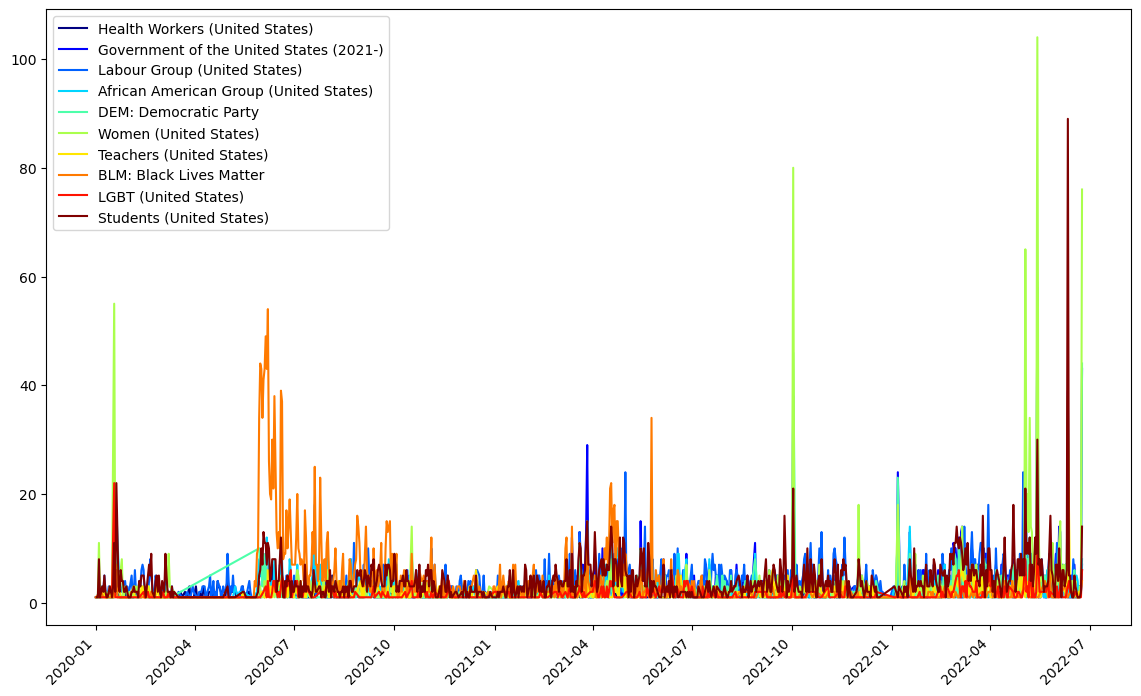

In [262]:
labels = set(assoc_actors_df ['assoc_actors_split'].values)
colors = pl.cm.jet(np.linspace(0,1,len(labels)))
plt.figure(figsize=(14,8))
for key, color in zip(labels, range(len(labels))):
    data_x = assoc_actors_df.loc[assoc_actors_df['assoc_actors_split']==key]['event_date_formatted']
    data_y = assoc_actors_df.loc[assoc_actors_df['assoc_actors_split']==key]['data_id']
    plt.plot(data_x, data_y, color=colors[color], label=key)
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()

## Group by year and month

In [270]:
df_actors_1['month'] =df_actors_1['event_date_formatted'].dt.month

In [276]:
df_month = pd.DataFrame(df_actors_1.groupby(['year', 'month','assoc_actors_split'])['data_id'].count()).reset_index()

In [278]:
df_month

year  month                                 assoc_actors_split  data_id
0     2020      1               ACLU: American Civil Liberties Union        3
1     2020      1  AFL-CIO: American Federation of Labor and Cong...        3
2     2020      1  AFSCME: American Federation of State, County a...        3
3     2020      1         ANSWER: Act Now to Stop War and End Racism       12
4     2020      1                                        Abolish ICE        1
...    ...    ...                                                ...      ...
4413  2022      6                                 WTP: We the People        1
4414  2022      6                                        We are CASA        2
4415  2022      6                            Westboro Baptist Church        1
4416  2022      6                              Women (United States)      198
4417  2022      6          YWCA: Young Women's Christian Association        2

[4418 rows x 4 columns]

#### 2020

In [284]:
assoc_actors_2020 = assoc_actors_df[assoc_actors_df['year'] == 2020].sort_values(by = 'event_date_formatted')

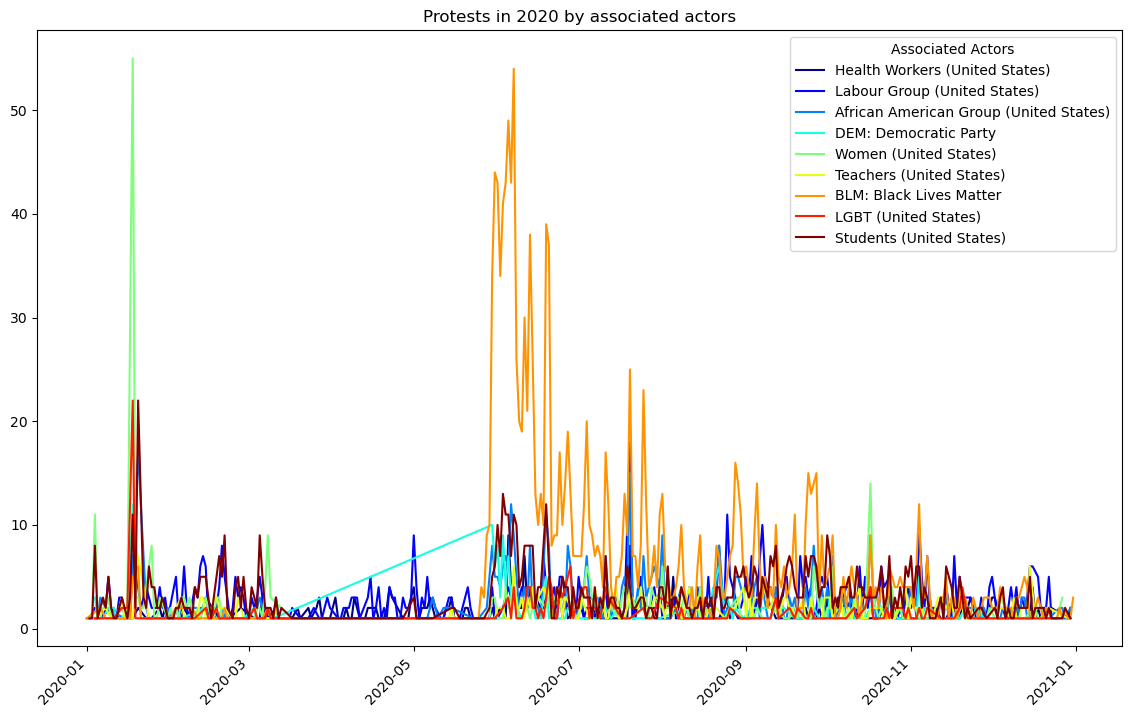

In [285]:
labels = set(assoc_actors_2020 ['assoc_actors_split'].values)
colors = pl.cm.jet(np.linspace(0,1,len(labels)))
plt.figure(figsize=(14,8))
for key, color in zip(labels, range(len(labels))):
    data_x = assoc_actors_2020.loc[assoc_actors_2020['assoc_actors_split']==key]['event_date_formatted']
    data_y = assoc_actors_2020.loc[assoc_actors_2020['assoc_actors_split']==key]['data_id']
    plt.plot(data_x, data_y, color=colors[color], label=key)
plt.legend(title = 'Associated Actors')
plt.title('Protests in 2020 by associated actors')
plt.xticks(rotation=45, ha='right')
plt.show()

## Plot the most common associated actors on a monthly basis in each year

In [443]:
#Function to plot the monthly
def plot_monthly_assoc_actors(year, threshold):
    df_month = pd.DataFrame(df_actors_1.groupby(['year', 'month','assoc_actors_split'])['data_id'].count()).reset_index()
    df_month = df_month[df_month['year']== year]
    df_month = df_month[df_month['data_id']>threshold]
    
    ax = sns.histplot(
    df_month,
    x='month',
    # Use the value variable here to turn histogram counts into weighted
    # values.
    weights='data_id',
    hue='assoc_actors_split',
    multiple='stack',
        bins=12,
    #palette=['#24b1d1', '#ae24d1'],
    # Add white borders to the bars.
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    shrink=0.8
    )
    sns.set_theme(rc={'figure.figsize':(20,10)})
    sns.move_legend(ax, "upper right")
    #leg = ax.axes.flat[0].get_legend()
    #ax.legend(title ='Associated Actors')
    plt.title('Associated Actors of Protests in {}'.format(year), size=20)
    plt.xlabel('Month')
    plt.ylabel('Number of Protests or Riots')
    plt.savefig('monthly_assoc_actors_{}.png'.format(year))
    plt.show()

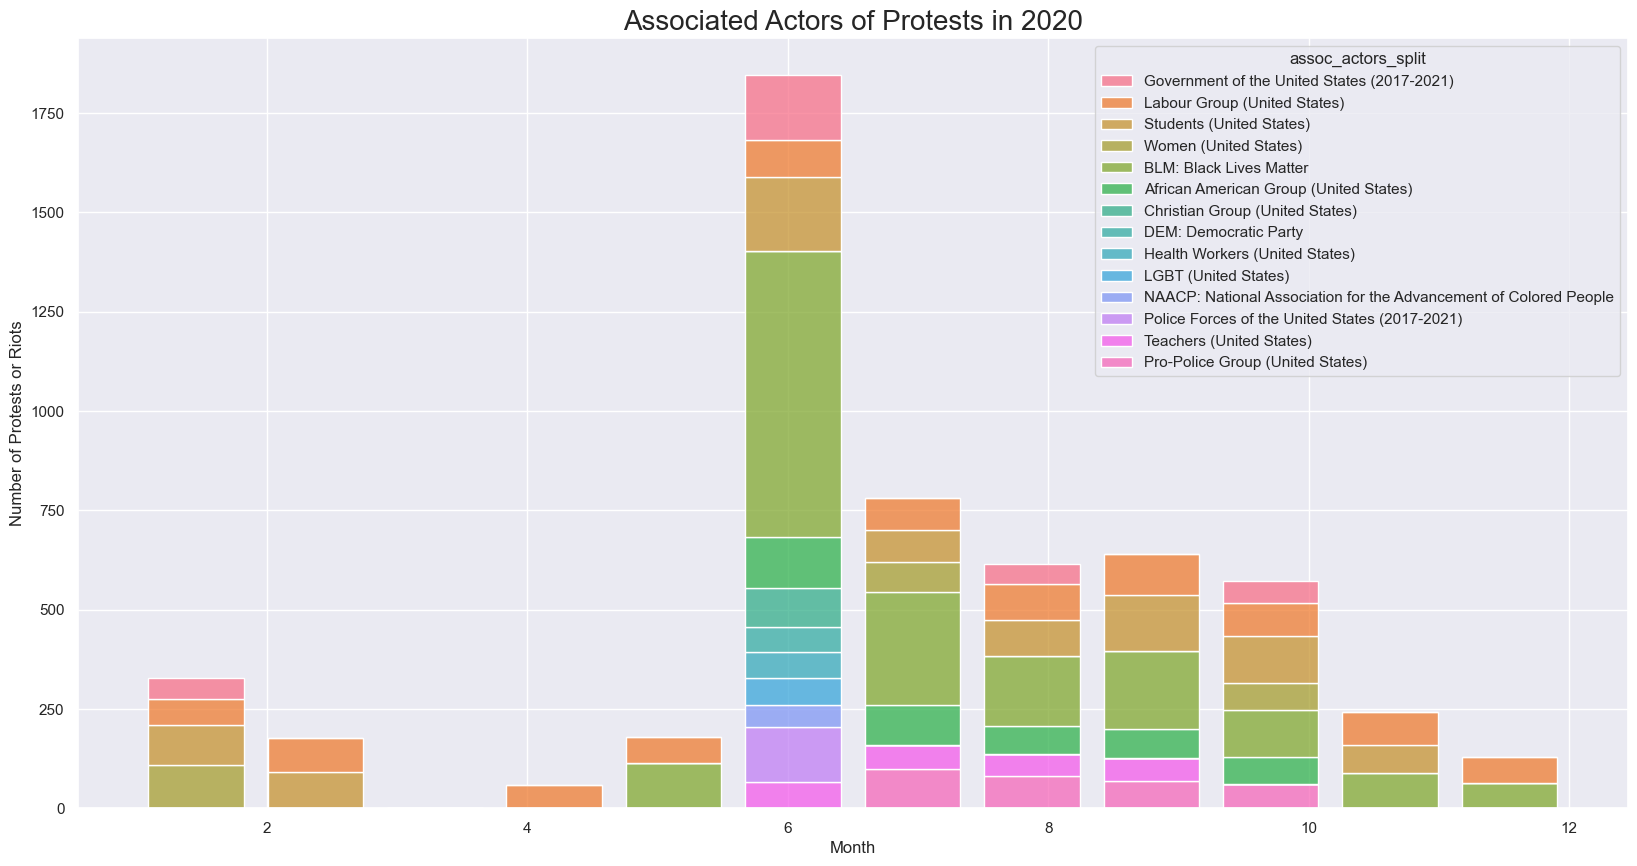

In [444]:
plot_monthly_assoc_actors(2020, 50)

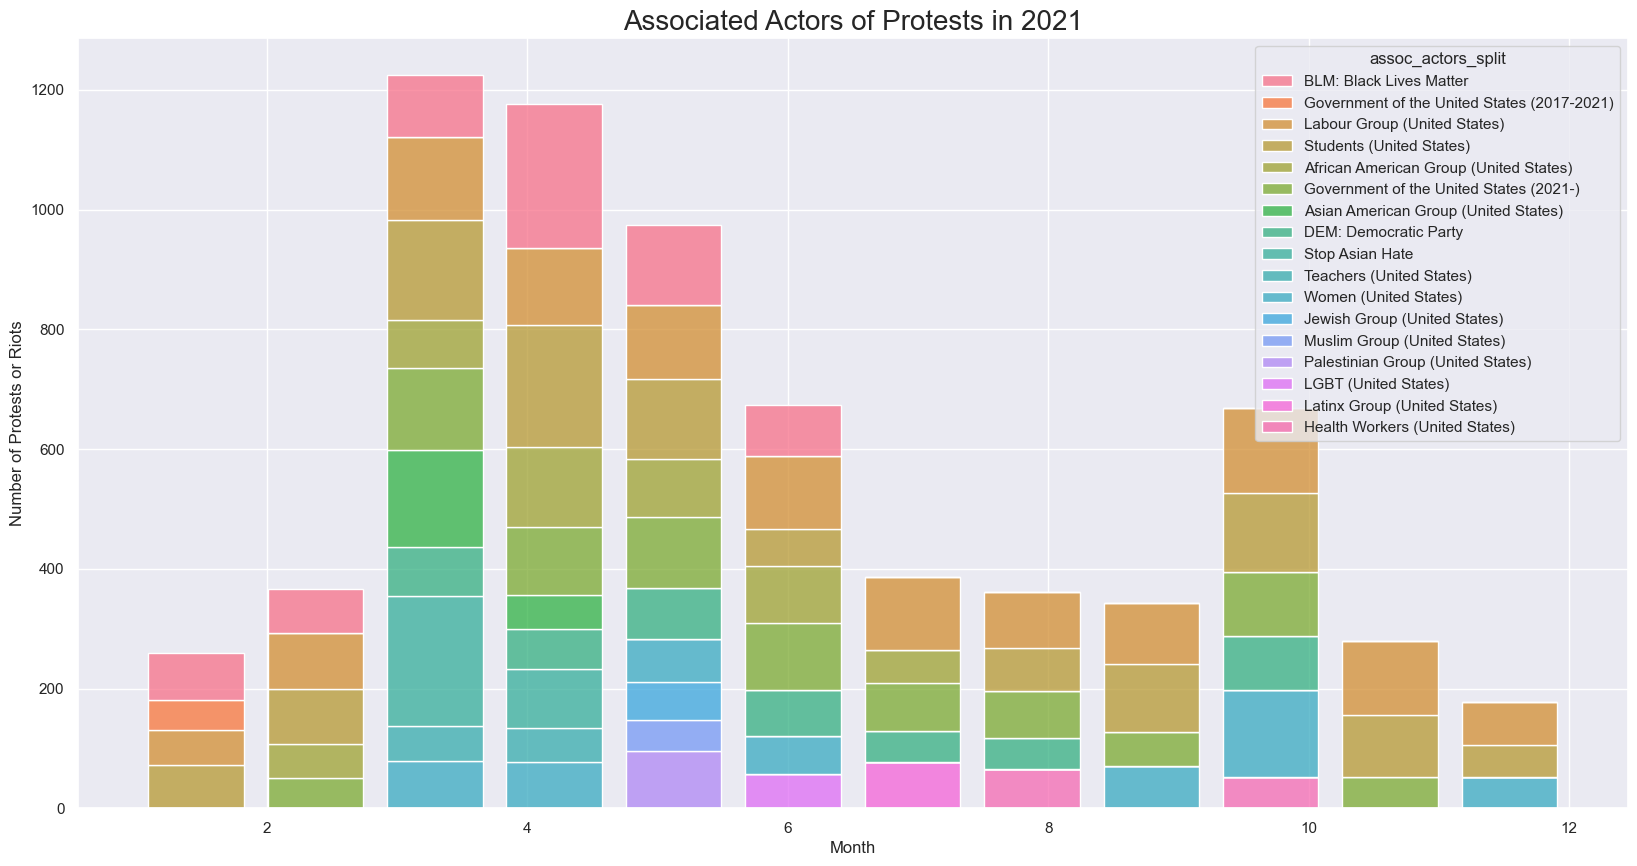

In [445]:
plot_monthly_assoc_actors(2021, 50)

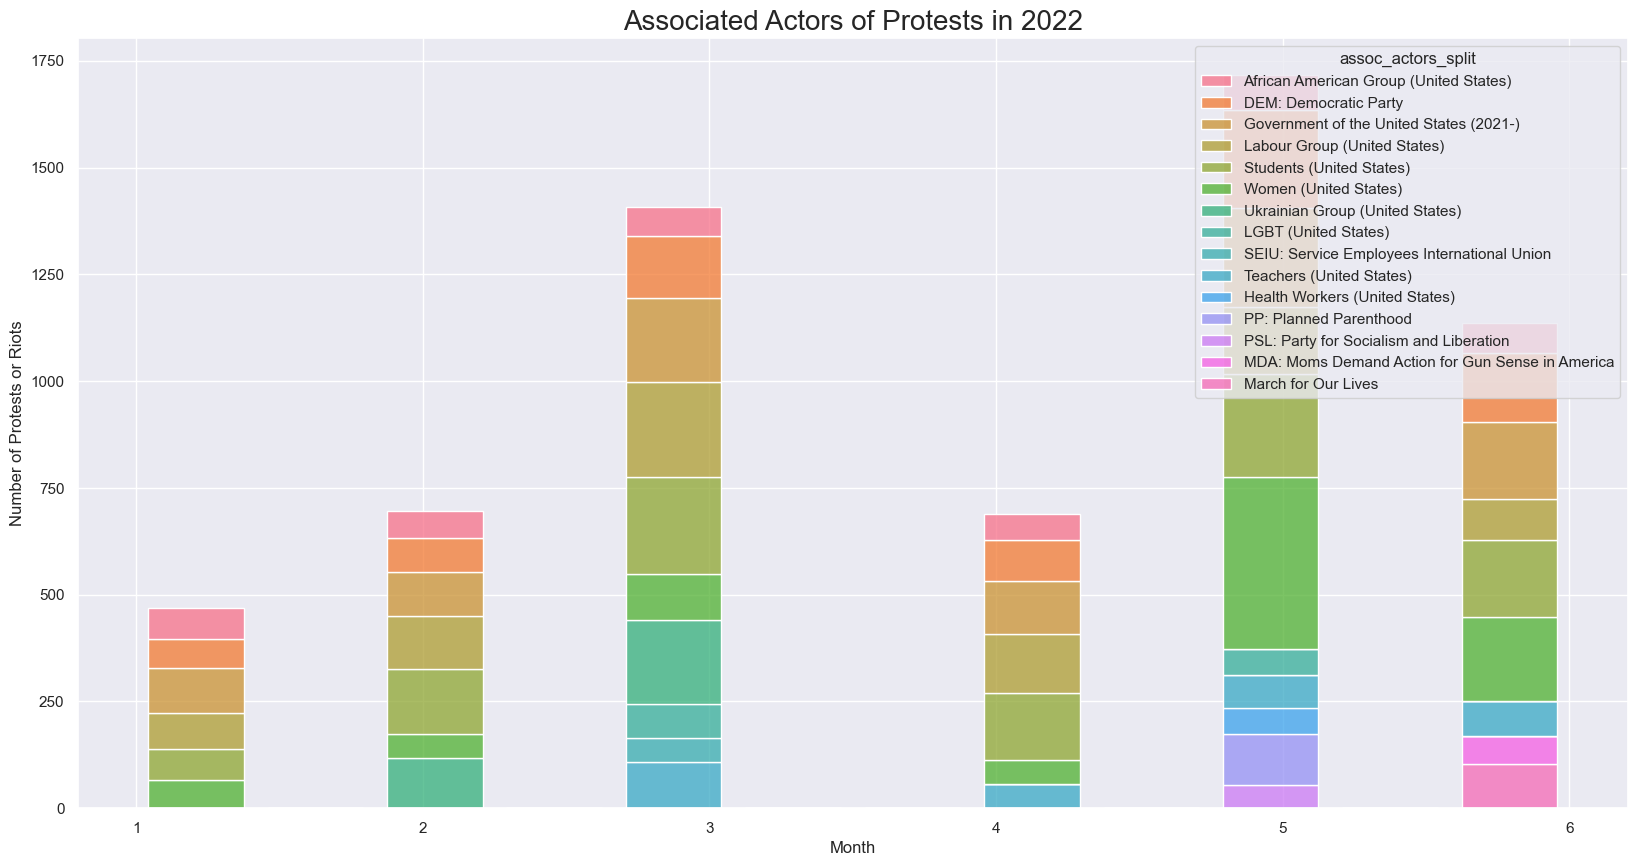

In [446]:
plot_monthly_assoc_actors(2022, 50)

### Caveat: There are more than one associated actors linked with several protest and riots, so the total count of the plots is not reflective of the total count of protests and riots

#### Briefly looking at Actor 2 (the column contains missing data)

In [31]:
df['actor2'].value_counts()

Protesters (United States)                                                                   1678
Police Forces of the United States (2017-2021)                                               1332
Police Forces of the United States (2021-)                                                    365
Rioters (United States)                                                                       151
Sole Perpetrator (United States)                                                              130
Civilians (United States)                                                                     108
Police Forces of the United States (2017-2021) Prison Guards                                   23
Private Security Forces (United States)                                                        21
Police Forces of the United States (2017-2021) Protecting American Communities Task Force      17
Police Forces of the United States (2021-) Department of Homeland Security                      9
Police Forces of the

## Are there different sources for different associated actors?
Look at top sources of top 10 associated actors

In [347]:
#sources for BLM and students
df.loc[df['assoc_actor_1']== 'BLM: Black Lives Matter','source'].value_counts()

Twitter                                          63
Crowd Counting Consortium; Twitter               45
Liveuamap                                        42
Twitter; Crowd Counting Consortium               32
Count Love                                       30
                                                 ..
News Journal (Wilmington-OH)                      1
Crowd Counting Consortium; San Bernardino Sun     1
KOTV6; Tulsa World                                1
Fox2 (St. Louis); St. Louis American              1
Count Love; Hill                                  1
Name: source, Length: 4411, dtype: int64

In [348]:
df.loc[df['assoc_actor_1']== 'Students (United States)','source'].value_counts()

Lantern                                                     10
San Diego Union-Tribune                                      9
Twitter                                                      9
New York Post                                                9
Harvard Crimson                                              8
                                                            ..
Crowd Counting Consortium; Beloit Daily News                 1
Crowd Counting Consortium; WEAU13                            1
NBC 7 San Diego; KPBS                                        1
Long Island Herald Newspapers; Crowd Counting Consortium     1
Monticello Herald Journal                                    1
Name: source, Length: 1211, dtype: int64

In [235]:
df['inter1'].value_counts()

6    41181
5     1072
Name: inter1, dtype: int64

In [237]:
df['notes'].value_counts()

Around 23 March 2021 (as reported), hundreds of hotel workers with Unite Here rallied and passed out leaflets on Oahu, Maui, and Kauai islands (Hawaii) calling on visitors to follow coronavirus guidelines. [size=hundreds]                                                                                                                                                                                                                                                                                                                                                                                                                              3
On 14 August 2020, an unreported number of people staged 'Roundabout Rallies' in Kings Beach, Meyers, Tahoe City, and Truckee (California) and in Incline Village (Nevada) in support of Lake Tahoe visitors cleaning up after themselves and against littering. Demonstrations occurred at five major entries to the Tahoe Basin. [size=no report]                        

# Next Steps
* Analyze 'notes' column and use natural language processing to learn more about the nature of protests and riots
* Look for sources of bias in the data by more closely analyzing sources and precision columns for actors and associated actors
* Analyze combinations of actor1 and actor2 and respective associated actors to learn which actors tend to be involved in the same riots; The same can be done using associated actors.